In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.colors import SymLogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import rioxarray as rxr
from scipy.interpolate import RegularGridInterpolator
from shapely.geometry import Point
import geopandas as gpd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.interpolate import griddata

In [14]:
sat_path = "E:/Ania/Grav/Python_Scripts/SWOT/grav_LA.nc" 

ds_sat = xr.open_dataset(sat_path)
#print(ds_sat)


lon = ds_sat["lon"].values
lat = ds_sat["lat"].values
sat_grav = ds_sat["z"].values  

interpolator = RegularGridInterpolator(
    (lat, lon),
    sat_grav,
    bounds_error=False,
    fill_value=np.nan
)

## Garanti

In [15]:
garanti_paths = [
    "E:/Ania/Grav/Python_Scripts/Garanti_GravMag/gravi-bord/Gravi/garanti1.xyz",
    "E:/Ania/Grav/Python_Scripts/Garanti_GravMag/gravi-bord/Gravi/garanti2.xyz",
    "E:/Ania/Grav/Python_Scripts/Garanti_GravMag/gravi-bord/Gravi/garanti3.xyz"
]

def load_gravity_file(file_path, skiprows=22):
    df = pd.read_csv(
        file_path,
        sep=r"\s+",
        skiprows=skiprows,
        names=["date", "time", "lat", "lon", "grav", "FAA"],
        engine="python"
    )
    df = df[df["FAA"] != -2147483648.00]
    return df

df_garanti = pd.concat([load_gravity_file(p) for p in garanti_paths], ignore_index=True)
df_garanti["mission"] = "Garanti"
print(df_garanti)

             date          time        lat        lon     grav     FAA  \
0        07/05/17  11:56:54.505  16.234451 -61.537077 -2397.42  109.60   
1        07/05/17  11:56:55.504  16.234451 -61.537077 -2397.42  109.61   
2        07/05/17  11:56:56.525  16.234451 -61.537077 -2397.42  109.61   
3        07/05/17  11:56:57.525  16.234451 -61.537077 -2397.42  109.61   
4        07/05/17  11:56:58.515  16.234451 -61.537077 -2397.41  109.62   
...           ...           ...        ...        ...      ...     ...   
3788551  24/06/17  22:06:15.652  16.234441 -61.537061 -2396.10  115.70   
3788552  24/06/17  22:06:16.631  16.234441 -61.537061 -2396.10  115.70   
3788553  24/06/17  22:06:17.652  16.234441 -61.537061 -2396.10  115.70   
3788554  24/06/17  22:06:18.651  16.234441 -61.537061 -2396.10  115.70   
3788555  24/06/17  22:06:19.652  16.234441 -61.537061 -2396.10  115.70   

         mission  
0        Garanti  
1        Garanti  
2        Garanti  
3        Garanti  
4        Garanti

In [16]:
file_paths = ["E:/Ania/Grav/Python_Scripts/Antithesis1/Grav/antithesis_grav_vrai.dat"]


no_data_value = -2147483648.00

def load_gravity_file(file_path):
    df = pd.read_csv(
        file_path,
        sep=r"\s+",
        skiprows=17,  
        names=["date", "time", "lat", "lon", "FAA"],
        engine="python"
    )
    df = df[df["FAA"] != no_data_value]
    return df

df_antithesis = pd.concat([load_gravity_file(path) for path in file_paths], ignore_index=True)
df_antithesis["mission"] = "Antithesis"
print(df_antithesis)

             date          time        lat        lon     FAA     mission
0        24/12/13  07:58:00.818  16.232971 -61.546371  105.88  Antithesis
1        24/12/13  07:58:01.819  16.232971 -61.546371  105.88  Antithesis
2        24/12/13  07:58:02.819  16.232971 -61.546371  105.88  Antithesis
3        24/12/13  07:58:03.818  16.232971 -61.546371  105.88  Antithesis
4        24/12/13  07:58:04.819  16.232971 -61.546372  105.88  Antithesis
...           ...           ...        ...        ...     ...         ...
1229446  07/01/14  16:27:59.721  16.028459 -61.191997   82.99  Antithesis
1229447  07/01/14  16:28:00.723  16.028472 -61.192020   82.96  Antithesis
1229448  07/01/14  16:28:01.721  16.028485 -61.192041   82.93  Antithesis
1229449  07/01/14  16:28:02.721  16.028498 -61.192063   82.90  Antithesis
1229450  07/01/14  16:28:03.722  16.028511 -61.192087   82.87  Antithesis

[1229451 rows x 6 columns]


In [17]:
df_garanti.to_csv("garanti.csv", index=False)

In [18]:
ds_sat = ds_sat.to_dataframe().reset_index()

ds_sat.to_csv("satellite.csv", index=False)

In [19]:
df_antithesis.to_csv("antithesis.csv", index=False)

In [20]:
df = pd.read_csv("garanti.csv") 

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"  # WGS84
)

gdf_utm = gdf.to_crs("EPSG:32620")

gdf_utm["x"] = gdf_utm.geometry.x
gdf_utm["y"] = gdf_utm.geometry.y

garanti_projected = gdf_utm.drop(columns="geometry")


In [21]:
df = pd.read_csv("antithesis.csv") 

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"  # WGS84
)

gdf_utm = gdf.to_crs("EPSG:32620")

gdf_utm["x"] = gdf_utm.geometry.x
gdf_utm["y"] = gdf_utm.geometry.y

antithesis_projected = gdf_utm.drop(columns="geometry")


In [22]:
df = pd.read_csv("satellite.csv") 

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lon, df.lat),
    crs="EPSG:4326"  # WGS84
)

gdf_utm = gdf.to_crs("EPSG:32620")

gdf_utm["x"] = gdf_utm.geometry.x
gdf_utm["y"] = gdf_utm.geometry.y

satellite_projected = gdf_utm.drop(columns="geometry")

In [23]:
print(satellite_projected)

               lon        lat          z             x             y
0       -64.991667   3.008333 -22.854506  2.786361e+05  3.327163e+05
1       -64.991667   3.025000 -23.425990  2.786395e+05  3.345596e+05
2       -64.991667   3.041667 -23.367544  2.786429e+05  3.364029e+05
3       -64.991667   3.058333 -22.479088  2.786463e+05  3.382463e+05
4       -64.991667   3.075000 -20.387278  2.786497e+05  3.400896e+05
...            ...        ...        ...           ...           ...
1619995 -40.008333  20.925000  -4.923292  2.939752e+06  2.495529e+06
1619996 -40.008333  20.941667  -5.757294  2.939454e+06  2.497489e+06
1619997 -40.008333  20.958333  -6.399673  2.939157e+06  2.499448e+06
1619998 -40.008333  20.975000  -6.619864  2.938859e+06  2.501408e+06
1619999 -40.008333  20.991667  -7.115702  2.938561e+06  2.503367e+06

[1620000 rows x 5 columns]


In [24]:
print(garanti_projected)

             date          time        lat        lon     grav     FAA  \
0        07/05/17  11:56:54.505  16.234451 -61.537077 -2397.42  109.60   
1        07/05/17  11:56:55.504  16.234451 -61.537077 -2397.42  109.61   
2        07/05/17  11:56:56.525  16.234451 -61.537077 -2397.42  109.61   
3        07/05/17  11:56:57.525  16.234451 -61.537077 -2397.42  109.61   
4        07/05/17  11:56:58.515  16.234451 -61.537077 -2397.41  109.62   
...           ...           ...        ...        ...      ...     ...   
3788551  24/06/17  22:06:15.652  16.234441 -61.537061 -2396.10  115.70   
3788552  24/06/17  22:06:16.631  16.234441 -61.537061 -2396.10  115.70   
3788553  24/06/17  22:06:17.652  16.234441 -61.537061 -2396.10  115.70   
3788554  24/06/17  22:06:18.651  16.234441 -61.537061 -2396.10  115.70   
3788555  24/06/17  22:06:19.652  16.234441 -61.537061 -2396.10  115.70   

         mission              x             y  
0        Garanti  656351.041612  1.795427e+06  
1        Garant

In [25]:
print(antithesis_projected)

             date          time        lat        lon     FAA     mission  \
0        24/12/13  07:58:00.818  16.232971 -61.546371  105.88  Antithesis   
1        24/12/13  07:58:01.819  16.232971 -61.546371  105.88  Antithesis   
2        24/12/13  07:58:02.819  16.232971 -61.546371  105.88  Antithesis   
3        24/12/13  07:58:03.818  16.232971 -61.546371  105.88  Antithesis   
4        24/12/13  07:58:04.819  16.232971 -61.546372  105.88  Antithesis   
...           ...           ...        ...        ...     ...         ...   
1229446  07/01/14  16:27:59.721  16.028459 -61.191997   82.99  Antithesis   
1229447  07/01/14  16:28:00.723  16.028472 -61.192020   82.96  Antithesis   
1229448  07/01/14  16:28:01.721  16.028485 -61.192041   82.93  Antithesis   
1229449  07/01/14  16:28:02.721  16.028498 -61.192063   82.90  Antithesis   
1229450  07/01/14  16:28:03.722  16.028511 -61.192087   82.87  Antithesis   

                     x             y  
0        655358.718159  1.795257e+06

In [26]:
means = antithesis_projected.groupby(['lat', 'lon']).agg({
    'FAA': 'mean'
}).reset_index()

first_rows = antithesis_projected.drop_duplicates(subset=['lat', 'lon'])

antithesis_cleaned = pd.merge(
    first_rows,
    means,
    on=['lat', 'lon'],
    suffixes=('_original', '')
)

antithesis_cleaned = antithesis_cleaned[[
    'date', 'time', 'lat', 'lon',
    'FAA', 'x', 'y', 'mission'
]].rename(columns={
    'lat': 'lat',
    'lon': 'lon'
})

print(antithesis_cleaned)


            date          time        lat        lon         FAA  \
0       24/12/13  07:58:00.818  16.232971 -61.546371  105.931761   
1       24/12/13  07:58:04.819  16.232971 -61.546372  105.932814   
2       24/12/13  07:58:28.819  16.232972 -61.546372  105.940000   
3       24/12/13  07:58:52.788  16.232972 -61.546371  105.947613   
4       24/12/13  07:59:06.818  16.232973 -61.546371  105.909300   
...          ...           ...        ...        ...         ...   
716326  07/01/14  16:27:59.721  16.028459 -61.191997   82.990000   
716327  07/01/14  16:28:00.723  16.028472 -61.192020   82.960000   
716328  07/01/14  16:28:01.721  16.028485 -61.192041   82.930000   
716329  07/01/14  16:28:02.721  16.028498 -61.192063   82.900000   
716330  07/01/14  16:28:03.722  16.028511 -61.192087   82.870000   

                    x             y     mission  
0       655358.718159  1.795257e+06  Antithesis  
1       655358.611263  1.795257e+06  Antithesis  
2       655358.610478  1.795257e+

In [27]:
means = garanti_projected.groupby(['lat', 'lon']).agg({
    'grav': 'mean',
    'FAA': 'mean'
}).reset_index()

first_rows = garanti_projected.drop_duplicates(subset=['lat', 'lon'])

garanti_cleaned = pd.merge(
    first_rows,
    means,
    on=['lat', 'lon'],
    suffixes=('_original', '')
)

garanti_cleaned = garanti_cleaned[[
    'date', 'time', 'lat', 'lon',
    'grav', 'FAA', 'x', 'y', 'mission'
]].rename(columns={
    'lat': 'lat',
    'lon': 'lon'
})

print(garanti_cleaned)


             date          time        lat        lon         grav  \
0        07/05/17  11:56:54.505  16.234451 -61.537077 -2397.071296   
1        07/05/17  11:57:27.517  16.234450 -61.537077 -2397.360000   
2        07/05/17  11:57:45.515  16.234451 -61.537076 -2397.381553   
3        07/05/17  12:03:16.566  16.234451 -61.537075 -2397.376964   
4        07/05/17  12:04:40.585  16.234450 -61.537075 -2397.195938   
...           ...           ...        ...        ...          ...   
3771910  24/06/17  22:00:31.651  16.234442 -61.537062 -2395.918652   
3771911  24/06/17  22:00:56.631  16.234441 -61.537063 -2395.961429   
3771912  24/06/17  22:04:13.642  16.234442 -61.537061 -2395.842353   
3771913  24/06/17  22:04:24.681  16.234441 -61.537062 -2395.935000   
3771914  24/06/17  22:04:31.622  16.234441 -61.537061 -2396.011058   

                FAA              x             y  mission  
0        110.056296  656351.041612  1.795427e+06  Garanti  
1        109.660000  656351.042402  1.7

In [28]:
points = garanti_cleaned[["lat", "lon"]].values
garanti_cleaned = garanti_cleaned.copy()
garanti_cleaned['satellite_gravity'] = interpolator(points)

garanti_cleaned.to_csv("garanti_with_satellite_gravity_cleaned.csv", index=False)



In [29]:
garanti_cleaned['difference'] = garanti_cleaned['FAA'] - garanti_cleaned['satellite_gravity']
garanti_cleaned_final = garanti_cleaned[garanti_cleaned['difference'].abs() < 10]
print(garanti_cleaned_final)
stats_garanti = garanti_cleaned['difference'].describe()

print("Garanti: \n", stats_garanti)



             date          time        lat        lon         grav  \
0        07/05/17  11:56:54.505  16.234451 -61.537077 -2397.071296   
1        07/05/17  11:57:27.517  16.234450 -61.537077 -2397.360000   
2        07/05/17  11:57:45.515  16.234451 -61.537076 -2397.381553   
3        07/05/17  12:03:16.566  16.234451 -61.537075 -2397.376964   
4        07/05/17  12:04:40.585  16.234450 -61.537075 -2397.195938   
...           ...           ...        ...        ...          ...   
3771910  24/06/17  22:00:31.651  16.234442 -61.537062 -2395.918652   
3771911  24/06/17  22:00:56.631  16.234441 -61.537063 -2395.961429   
3771912  24/06/17  22:04:13.642  16.234442 -61.537061 -2395.842353   
3771913  24/06/17  22:04:24.681  16.234441 -61.537062 -2395.935000   
3771914  24/06/17  22:04:31.622  16.234441 -61.537061 -2396.011058   

                FAA              x             y  mission  satellite_gravity  \
0        110.056296  656351.041612  1.795427e+06  Garanti         118.443490   

In [30]:
points = antithesis_cleaned[["lat", "lon"]].values
antithesis_cleaned = antithesis_cleaned.copy()
antithesis_cleaned['satellite_gravity'] = interpolator(points)

antithesis_cleaned.to_csv("antithesis_with_satellite_gravity_cleaned.csv", index=False)

In [31]:
antithesis_cleaned['difference'] = antithesis_cleaned['FAA'] - antithesis_cleaned['satellite_gravity']
antithesis_cleaned_final = antithesis_cleaned[antithesis_cleaned['difference'].abs() < 10]
print(antithesis_cleaned_final)
stats_antithesis = antithesis_cleaned_final['difference'].describe()

print("Antithesis: \n", stats_antithesis)



            date          time        lat        lon     FAA              x  \
2753    25/12/13  13:48:56.685  16.234039 -61.541322  108.27  655897.595050   
2754    25/12/13  13:48:57.684  16.234036 -61.541291  108.31  655900.911176   
2755    25/12/13  13:48:58.684  16.234032 -61.541260  108.36  655904.228089   
2756    25/12/13  13:48:59.685  16.234029 -61.541229  108.40  655907.544215   
2757    25/12/13  13:49:00.684  16.234025 -61.541197  108.44  655910.968024   
...          ...           ...        ...        ...     ...            ...   
716326  07/01/14  16:27:59.721  16.028459 -61.191997   82.99  693441.071975   
716327  07/01/14  16:28:00.723  16.028472 -61.192020   82.96  693438.597933   
716328  07/01/14  16:28:01.721  16.028485 -61.192041   82.93  693436.337935   
716329  07/01/14  16:28:02.721  16.028498 -61.192063   82.90  693433.970916   
716330  07/01/14  16:28:03.722  16.028511 -61.192087   82.87  693431.389854   

                   y     mission  satellite_gravity

In [32]:
excluded_points_ant = antithesis_cleaned[antithesis_cleaned['difference'].abs() >= 10]
excluded_points_gar = garanti_cleaned[garanti_cleaned['difference'].abs() >= 10]


Getting rid of the OBS deployment lines for GARANTI

In [33]:
# from datetime import datetime


# garanti_cleaned['datetime'] = pd.to_datetime(garanti_cleaned['date'] + ' ' + garanti_cleaned['time'], format='%d/%m/%y %H:%M:%S.%f')


In [34]:
# obs1_box = garanti_cleaned[
#     (garanti_cleaned['lon'] >= -62.7) & (garanti_cleaned['lon'] <= -62.1) &
#     (garanti_cleaned['lat'] >= 13.6) & (garanti_cleaned['lat'] <= 16.8)
# ]

# obs1_deploy = obs1_box[
#     (obs1_box['datetime'] >= '2017-05-07 22:08:00') &
#     (obs1_box['datetime'] <= '2017-05-09 00:15:00')
# ]
# recovery_obs1 = obs1_box[
#     (obs1_box['datetime'] >= '2017-05-11 10:00:00') &
#     (obs1_box['datetime'] <= '2017-05-13 17:45:00')
# ]

In [35]:
# garanti_cleaned_final = garanti_cleaned_final[~garanti_cleaned_final.index.isin(obs1_deploy.index)]
# garanti_cleaned_final = garanti_cleaned_final[~garanti_cleaned_final.index.isin(recovery_obs1.index)]

In [36]:
# excluded_obs1 = obs1_deploy.copy()
# excluded_obs1_recovery = recovery_obs1.copy()

In [37]:
# excluded_obs_all = pd.concat([excluded_obs1, excluded_obs2, excluded_obs3], ignore_index=True)

In [38]:
# print(excluded_obs1)
# print(excluded_obs1_recovery)

(376378.9295182066, 879520.0927743271, 1362171.7235184214, 2080264.1558522952)

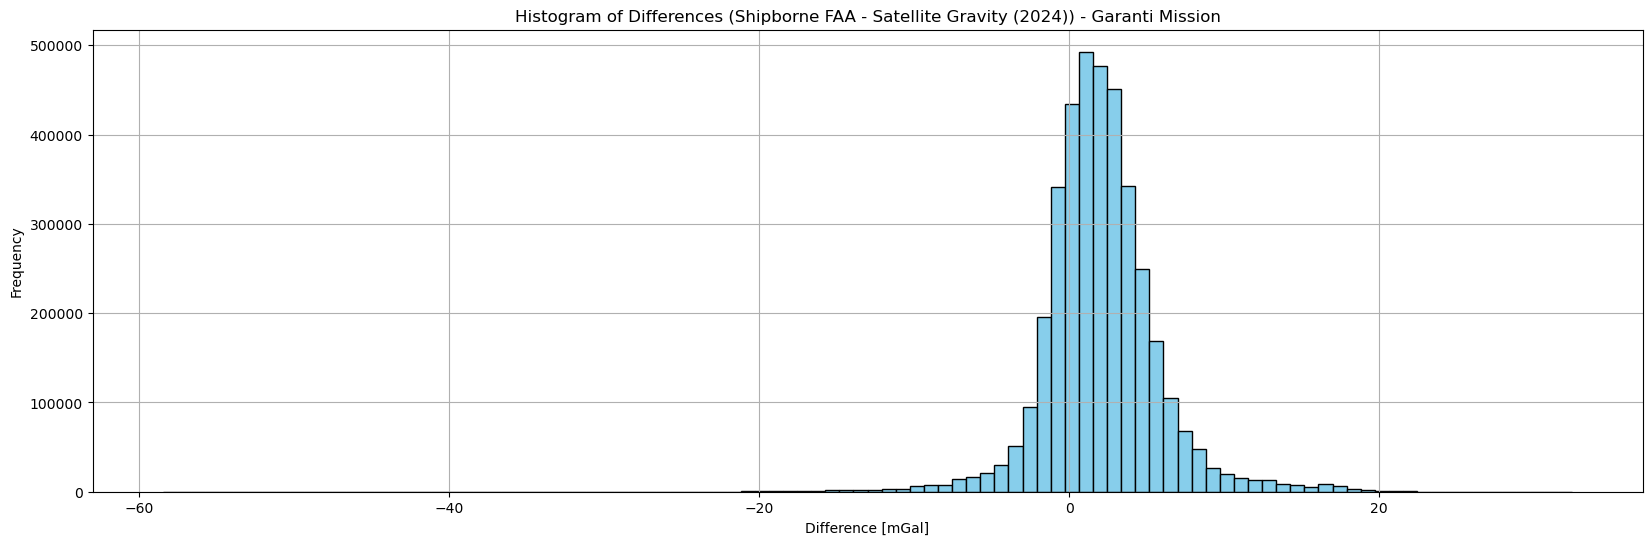

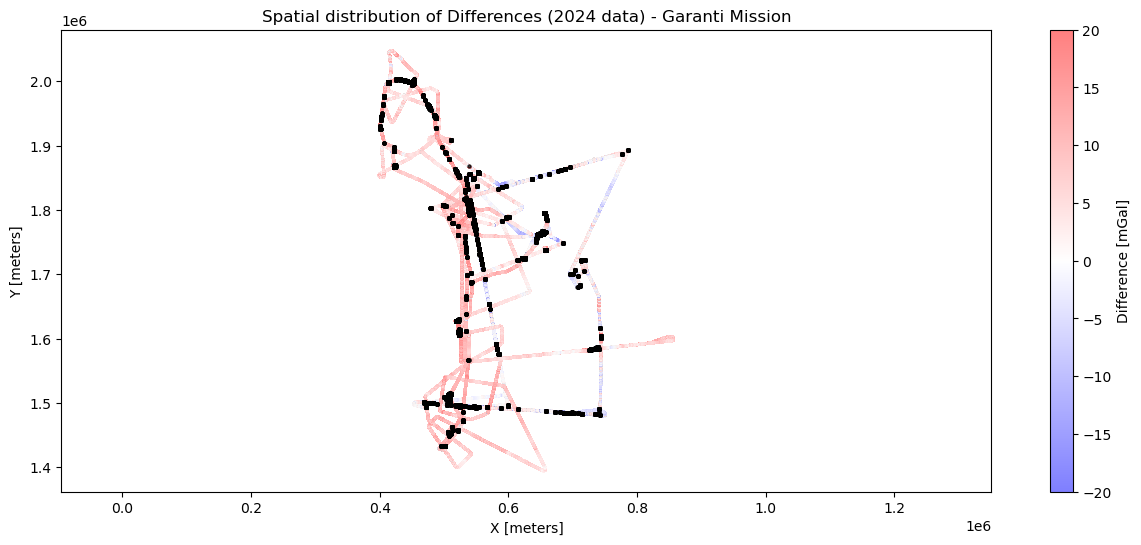

In [39]:
plt.figure(figsize=(20,6))
plt.hist(garanti_cleaned['difference'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Differences (Shipborne FAA - Satellite Gravity (2024)) - Garanti Mission')
plt.xlabel('Difference [mGal]')
plt.ylabel('Frequency')
plt.grid(True)

plt.figure(figsize=(15,6))
sc = plt.scatter(garanti_cleaned_final['x'], garanti_cleaned_final['y'], c=garanti_cleaned_final['difference'], cmap='bwr', s=1, alpha=0.5, vmin=-20, vmax=20)
plt.scatter(excluded_points_gar['x'], excluded_points_gar['y'], color='black', s=5, alpha=0.7, label='Excluded Points (|difference| >= 10)')
# plt.scatter(excluded_obs1['x'], excluded_obs1['y'], color='orange', s=5, alpha=0.7, label='Excluded OBS1 Deployment Line')
# plt.scatter(excluded_obs1_recovery['x'], excluded_obs1_recovery['y'], color='red', s=5, alpha=0.7, label='Excluded OBS1 Deployment Line')
plt.colorbar(sc, label='Difference [mGal]')
plt.title('Spatial distribution of Differences (2024 data) - Garanti Mission')
plt.xlabel('X [meters]')
plt.ylabel('Y [meters]')
plt.axis('equal')

(561850.3050795217, 1094293.3094493942, 1630803.571675996, 2157686.21920526)

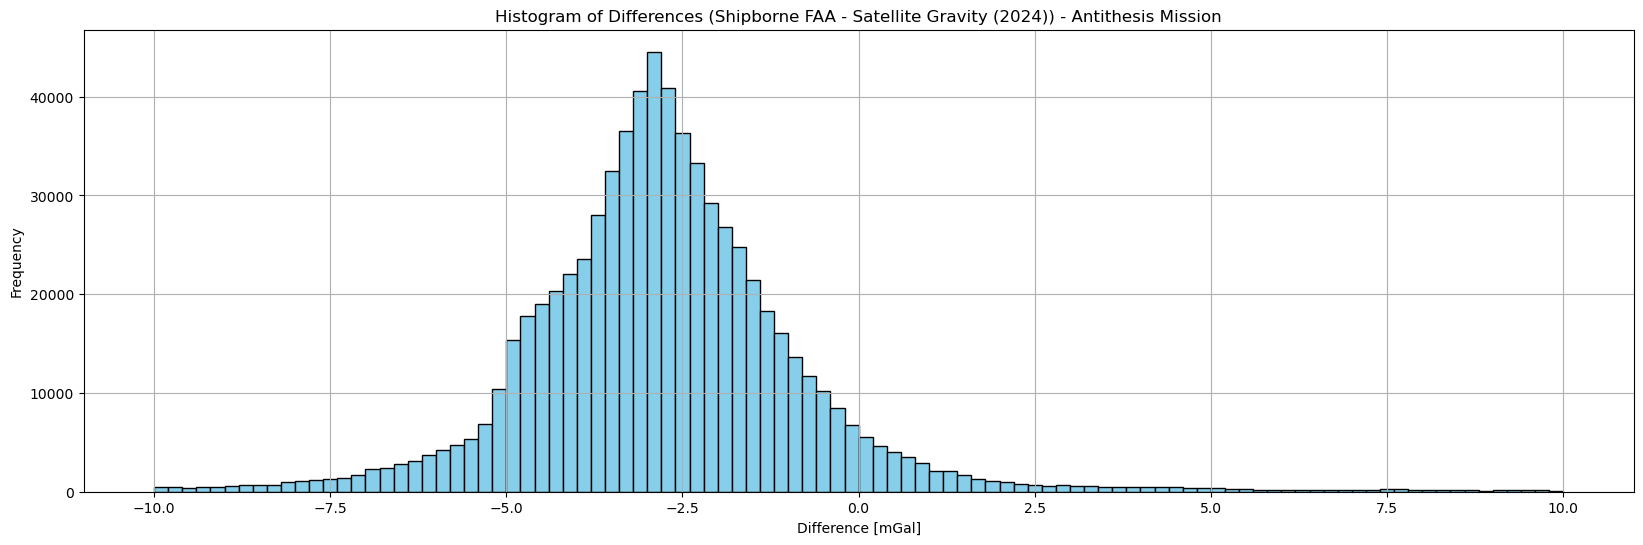

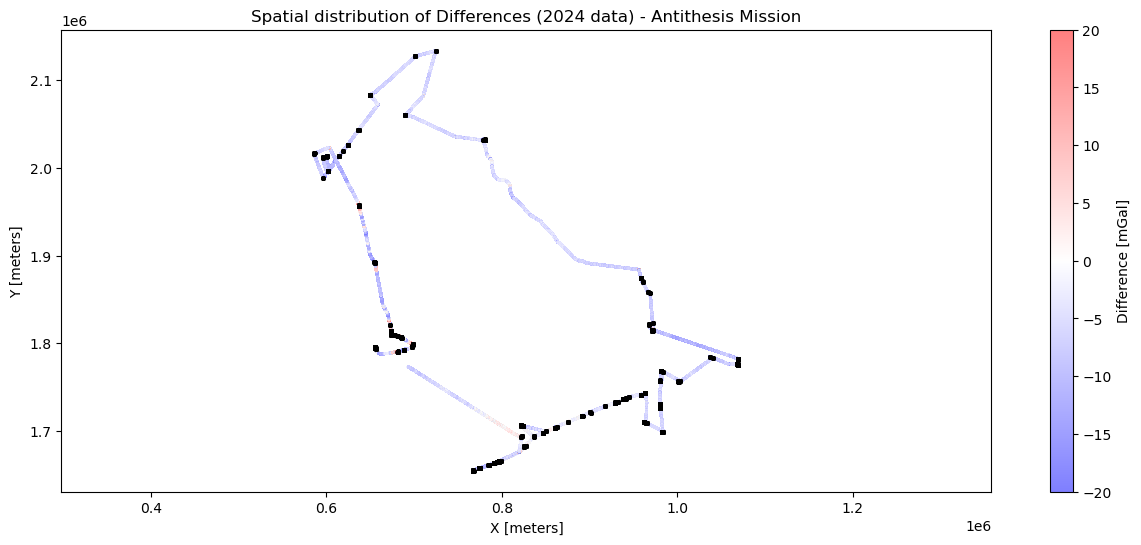

In [40]:
plt.figure(figsize=(20,6))
plt.hist(antithesis_cleaned_final['difference'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Differences (Shipborne FAA - Satellite Gravity (2024)) - Antithesis Mission')
plt.xlabel('Difference [mGal]')
plt.ylabel('Frequency')
plt.grid(True)

plt.figure(figsize=(15,6))
sc = plt.scatter(antithesis_cleaned_final['x'], antithesis_cleaned_final['y'], c=antithesis_cleaned_final['difference'], cmap='bwr', s=1, alpha=0.5, vmin=-20, vmax=20)
plt.scatter(excluded_points_ant['x'], excluded_points_ant['y'], color='black', s=5, alpha=0.7, label='Excluded Points (|difference| >= 10)')
plt.colorbar(sc, label='Difference [mGal]')
plt.title('Spatial distribution of Differences (2024 data) - Antithesis Mission')
plt.xlabel('X [meters]')
plt.ylabel('Y [meters]')
plt.axis('equal')

In [29]:
print("Filtered x range:", garanti_cleaned['x'].min(), garanti_cleaned['x'].max())
print("Excluded x range:", excluded_points_gar['x'].min(), excluded_points_gar['x'].max())

print("Filtered y range:", garanti_cleaned['y'].min(), garanti_cleaned['y'].max())
print("Excluded y range:", excluded_points_ant['y'].min(), excluded_points_ant['y'].max())

Filtered x range: 399248.98239348485 856650.039899049
Excluded x range: 400180.86831384816 786293.7374456681
Filtered y range: 1394812.2886245067 2047623.59074621
Excluded y range: 1654752.7829273262 2133737.0079539297


In [41]:
# Calculate the distance from one point to each satellite point 

sat_point = satellite_projected.iloc[0]
x_sat, y_sat = sat_point['x'], sat_point['y']

x_ship = garanti_cleaned_final['x'].values
y_ship = garanti_cleaned_final['y'].values

distances = np.sqrt((x_ship - x_sat) ** 2 + (y_ship - y_sat) ** 2) * 0.001

garanti_cleaned_final['distance_to_sat0'] = distances

print("Minimum distance to satellite point 0:", distances.min())

# Then choose a diameter and delete the closest one
# np.arcwhere - ?


Minimum distance to satellite point 0: 1094.7556073868896


C:\Users\Inni\AppData\Local\Temp\ipykernel_8740\1017742296.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garanti_cleaned_final['distance_to_sat0'] = distances


In [42]:
print(sat_point)
print(x_sat)
print(y_sat)
print(x_ship)
print(y_ship)

lon       -64.991667
lat         3.008333
z         -22.854506
x      278636.102338
y      332716.268327
Name: 0, dtype: float64
278636.10233765363
332716.26832701126
[656351.04161248 656351.04240247 656351.14850799 ... 656352.75905074
 656352.65294522 656352.75984074]
[1795427.44004654 1795427.32939906 1795427.44080975 ... 1795426.45643056
 1795426.34501986 1795426.34578308]


In [43]:
print(garanti_cleaned_final[['x', 'y']].describe())
# full garanti area
# x_min, x_max = 390000, 860000
# y_min, y_max = 1390000, 2050000

x_min_try, x_max_try = 550000, 650000
y_min_try, y_max_try = 1600000, 1750000

# x_min_try, x_max_try = 600000, 800000
# y_min_try, y_max_try = 1800000, 1900000

# OBS2
# x_min_try, x_max_try = 450000, 750000
# y_min_try, y_max_try = 1450000, 1550000

                  x             y
count  3.653663e+06  3.653663e+06
mean   5.704787e+05  1.689014e+06
std    8.724731e+04  1.680349e+05
min    3.992490e+05  1.394812e+06
25%    5.130901e+05  1.511016e+06
50%    5.559644e+05  1.707941e+06
75%    6.165571e+05  1.833337e+06
max    8.566500e+05  2.047624e+06


In [44]:
ship_subset_try = garanti_cleaned_final[
    (garanti_cleaned_final['x'] >= x_min_try) & (garanti_cleaned_final['x'] <= x_max_try) &
    (garanti_cleaned_final['y'] >= y_min_try) & (garanti_cleaned_final['y'] <= y_max_try)
].copy()

sat_subset_try = satellite_projected[
    (satellite_projected['x'] >= x_min_try) & (satellite_projected['x'] <= x_max_try) &
    (satellite_projected['y'] >= y_min_try) & (satellite_projected['y'] <= y_max_try)
].copy()

print(f"Ship points: {len(ship_subset_try)}, Satellite points: {len(sat_subset_try)}")

Ship points: 398119, Satellite points: 4585


In [45]:
from tqdm import tqdm
sat_subset_try['min_distance_to_ship'] = np.nan

x_ship = ship_subset_try['x'].values
y_ship = ship_subset_try['y'].values

for idx, sat_point in tqdm(sat_subset_try.iterrows(), total=len(sat_subset_try)):
    x_sat, y_sat = sat_point['x'], sat_point['y']
    distances = np.sqrt((x_ship - x_sat)**2 + (y_ship - y_sat)**2) * 0.001  # km
    sat_subset_try.at[idx, 'min_distance_to_ship'] = distances.min()

100%|██████████████████████████████████████████████████████████████████████████████| 4585/4585 [01:00<00:00, 75.96it/s]


In [46]:
#radius of 5 km
sat_filtered_try = sat_subset_try[sat_subset_try['min_distance_to_ship'] > 5]

In [47]:
print(ship_subset_try)
print(sat_subset_try)

             date          time        lat        lon     grav    FAA  \
64374    08/05/17  06:02:28.463  15.828256 -62.509824 -2546.74 -10.24   
64375    08/05/17  06:02:29.464  15.828215 -62.509817 -2546.75 -10.25   
64376    08/05/17  06:02:30.486  15.828173 -62.509810 -2546.77 -10.26   
64377    08/05/17  06:02:31.463  15.828131 -62.509804 -2546.79 -10.27   
64378    08/05/17  06:02:32.464  15.828088 -62.509798 -2546.80 -10.28   
...           ...           ...        ...        ...      ...    ...   
3754696  24/06/17  17:10:16.377  15.824584 -61.665505 -2472.64  61.10   
3754697  24/06/17  17:10:17.316  15.824611 -61.665502 -2472.61  61.14   
3754698  24/06/17  17:10:18.317  15.824640 -61.665499 -2472.58  61.18   
3754699  24/06/17  17:10:19.336  15.824670 -61.665497 -2472.54  61.23   
3754700  24/06/17  17:10:20.317  15.824700 -61.665496 -2472.49  61.28   

                     x             y  mission  satellite_gravity  difference  \
64374    552489.813033  1.749999e+06  Garan

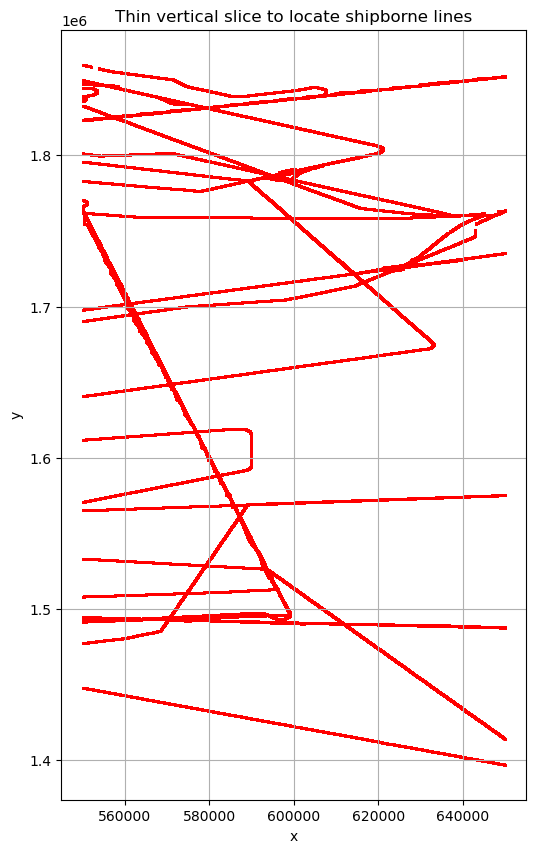

In [48]:
preview = garanti_cleaned_final[
    (garanti_cleaned_final['x'] > x_min_try) & (garanti_cleaned_final['x'] < x_max_try)
]
plt.figure(figsize=(6, 10))
plt.scatter(preview['x'], preview['y'], s=1, color='red')
plt.title("Thin vertical slice to locate shipborne lines")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

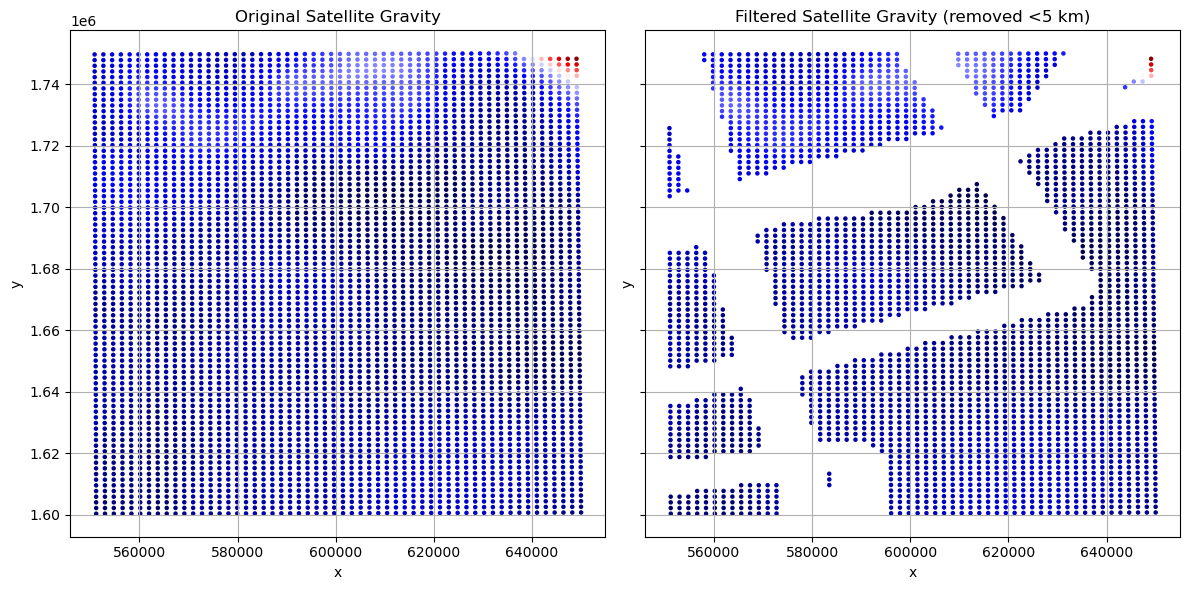

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

axs[0].scatter(sat_subset_try['x'], sat_subset_try['y'], c=sat_subset_try['z'], s=5, cmap='seismic')
axs[0].set_title("Original Satellite Gravity")

axs[1].scatter(sat_filtered_try['x'], sat_filtered_try['y'], c=sat_filtered_try['z'], s=5, cmap='seismic')
axs[1].set_title("Filtered Satellite Gravity (removed <5 km)")

for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [50]:
combined_x = np.concatenate([ship_subset_try['x'].values, sat_filtered_try['x'].values])
combined_y = np.concatenate([ship_subset_try['y'].values, sat_filtered_try['y'].values])
combined_gravity = np.concatenate([ship_subset_try['FAA'].values, sat_filtered_try['z'].values])


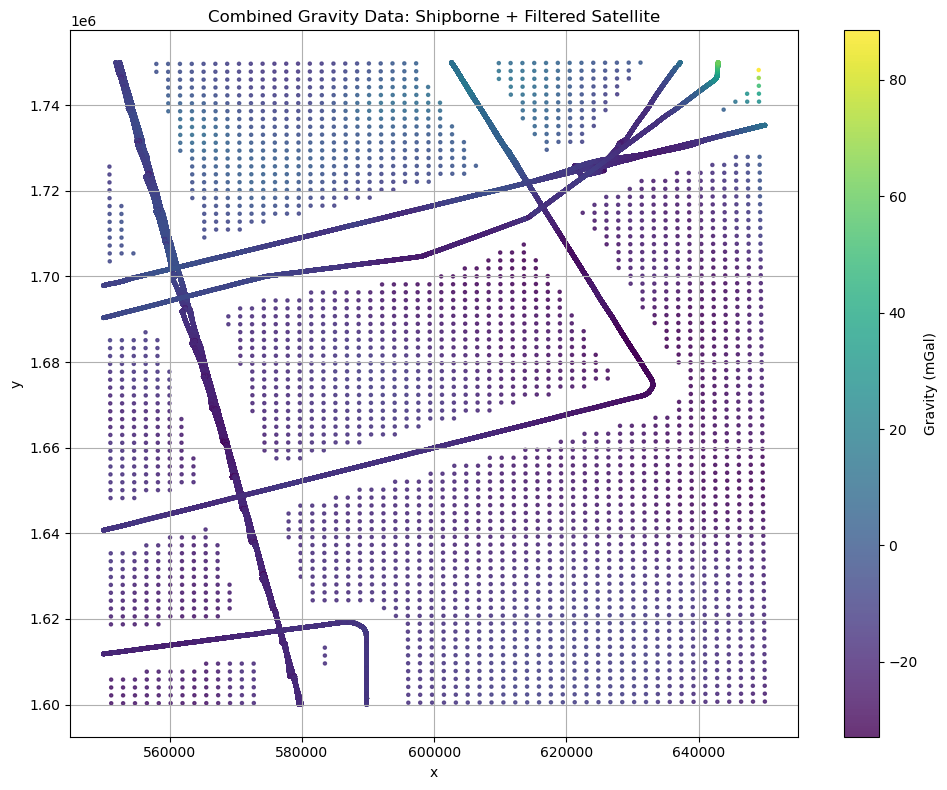

In [51]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(combined_x, combined_y, c=combined_gravity, cmap='viridis', s=5, alpha=0.8)
plt.colorbar(sc, label='Gravity (mGal)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Combined Gravity Data: Shipborne + Filtered Satellite')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
edge = 2000 
spacing = 2000  

xmin = combined_x.min() + edge
xmax = combined_x.max() - edge
ymin = combined_y.min() + edge
ymax = combined_y.max() - edge

xi, yi = np.meshgrid(
    np.arange(xmin, xmax, spacing),
    np.arange(ymin, ymax, spacing)
)

In [108]:
zi = griddata(
    points=(combined_x, combined_y),
    values=combined_gravity,
    xi=(xi, yi),
    method='linear'
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


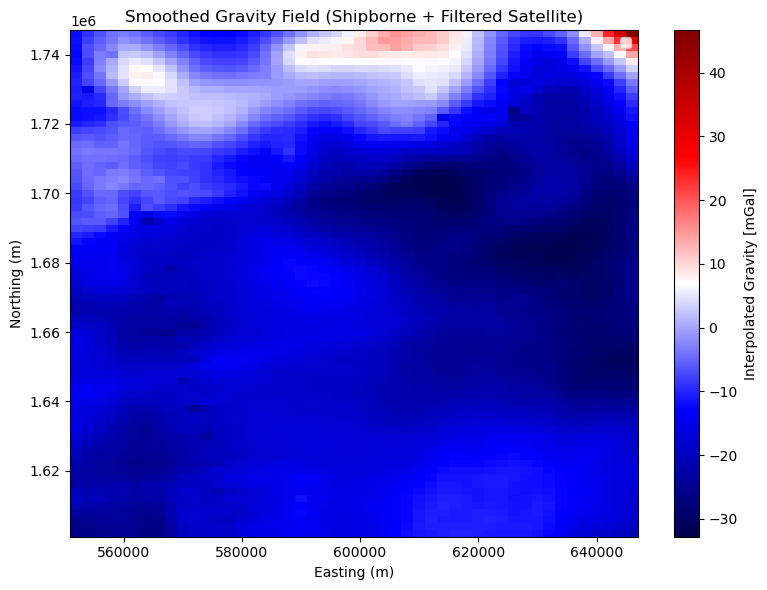

In [54]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='seismic')
plt.colorbar(label='Interpolated Gravity [mGal]')

# plt.scatter(xi.flatten(), yi.flatten(), c='k', s=2, alpha=0.3, label='Data Points')
# plt.scatter(combined_x, combined_y, c='y', s=2, alpha=0.3, label='Data Points')

plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Smoothed Gravity Field (Shipborne + Filtered Satellite)")
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
num_sat_points = len(sat_subset_try)
num_ship_points = len(ship_subset_try)

print(f"Number of satellite points: {num_sat_points}")
print(f"Number of shipborne points: {num_ship_points}")
print(f"Distance matrix size would be: ({num_sat_points}, {num_ship_points})")
print(f"Total elements: {num_sat_points * num_ship_points:,}")

Number of satellite points: 4585
Number of shipborne points: 398119
Distance matrix size would be: (4585, 398119)
Total elements: 1,825,375,615


## IDW

In [56]:
from pyproj import Proj

In [57]:
# # Some xyz data
# dat = np.loadtxt("test.xyz")

# # Interpolation points
# rumble_lon = 178.5
# rumble_lat = 35.73

# # define projection
# proj_utm = "+proj=utm+zone=1+south+ellps=WGS84+datum=WGS84+units=m+no_defs"
# proj = Proj(proj_utm)

In [58]:
# # Apply projection for both
# rumble_x_UTM, rumble_y_UTM = proj(rumble_lon, rumble_lat)
# bathy_x_UTM, bathy_y_UTM = proj(dat[:,0], dat[:,1])

In [59]:
# # Define radius in meters and power
# rmax = 1000
# p = 2

# # Apply inverse distance weighting
# distance = np.zeros(len(dat))
# for i in range(len(dat)):
#     distance[i] = np.sqrt((rumble_x_UTM - bathy_x_UTM[i])**2 + (rumble_y_UTM - bathy_y_UTM[i])**2)
# ir = (distance<rmax).nonzero()
# zaehler = (dat[ir,2]/distance[ir]**p).sum(axis=1)
# nenner = (1/distance[ir]**p).sum(axis=0)
# z0 = zaehler/nenner
# print(z0)

In [60]:
rmax = 20000  # radius in meters
p = 2         # IDW power

zi_idw = np.full_like(xi, np.nan, dtype=float)

data_x = combined_x
data_y = combined_y
data_z = combined_gravity

for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        x0, y0 = xi[i, j], yi[i, j]

        dists = np.sqrt((data_x - x0)**2 + (data_y - y0)**2)

        within_radius = dists < rmax
        if not np.any(within_radius):
            continue  

        d = dists[within_radius]
        z = data_z[within_radius]

        d[d == 0] = 1e-10

        weights = 1 / d**p
        zi_idw[i, j] = np.sum(weights * z) / np.sum(weights)


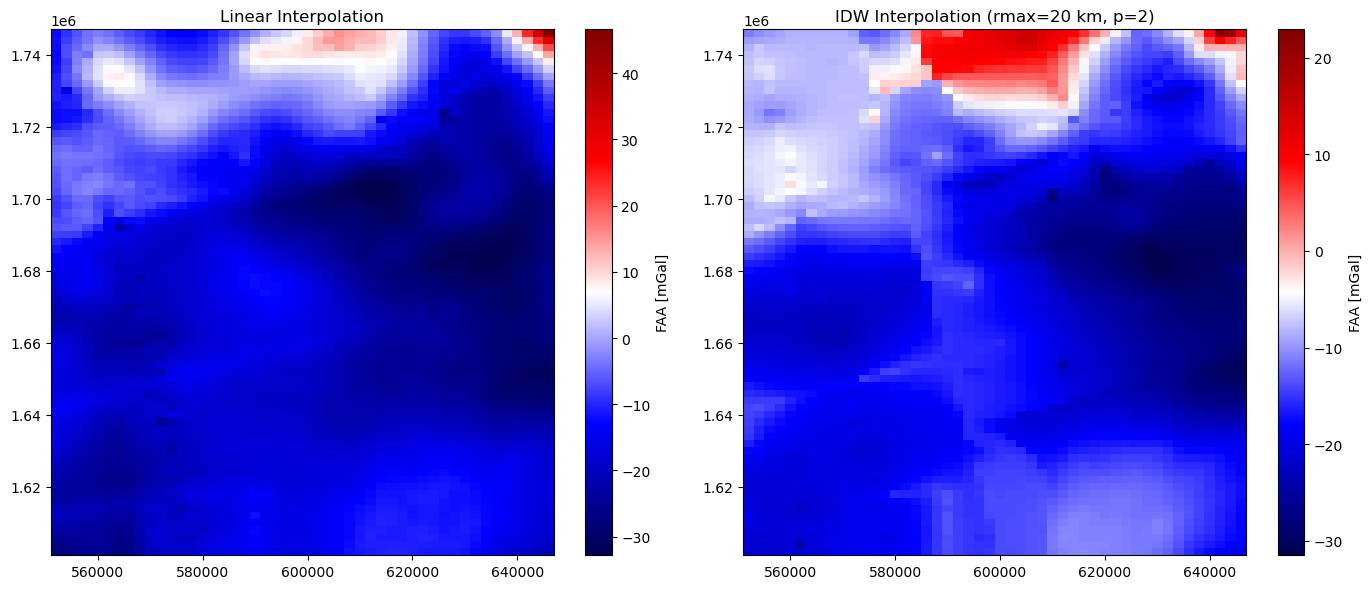

In [61]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='seismic')
plt.title("Linear Interpolation")
plt.colorbar(label='FAA [mGal]')

plt.subplot(1, 2, 2)
plt.pcolormesh(xi, yi, zi_idw, shading='auto', cmap='seismic')
plt.title("IDW Interpolation (rmax=20 km, p=2)")
plt.colorbar(label='FAA [mGal]')

plt.tight_layout()
plt.show()

In [62]:
rmax = 5000  # radius in meters
p = 2         # IDW power

zi_idw = np.full_like(xi, np.nan, dtype=float)

data_x = combined_x
data_y = combined_y
data_z = combined_gravity

for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        x0, y0 = xi[i, j], yi[i, j]

        dists = np.sqrt((data_x - x0)**2 + (data_y - y0)**2)

        within_radius = dists < rmax
        if not np.any(within_radius):
            continue  

        d = dists[within_radius]
        z = data_z[within_radius]

        d[d == 0] = 1e-10

        weights = 1 / d**p
        zi_idw[i, j] = np.sum(weights * z) / np.sum(weights)

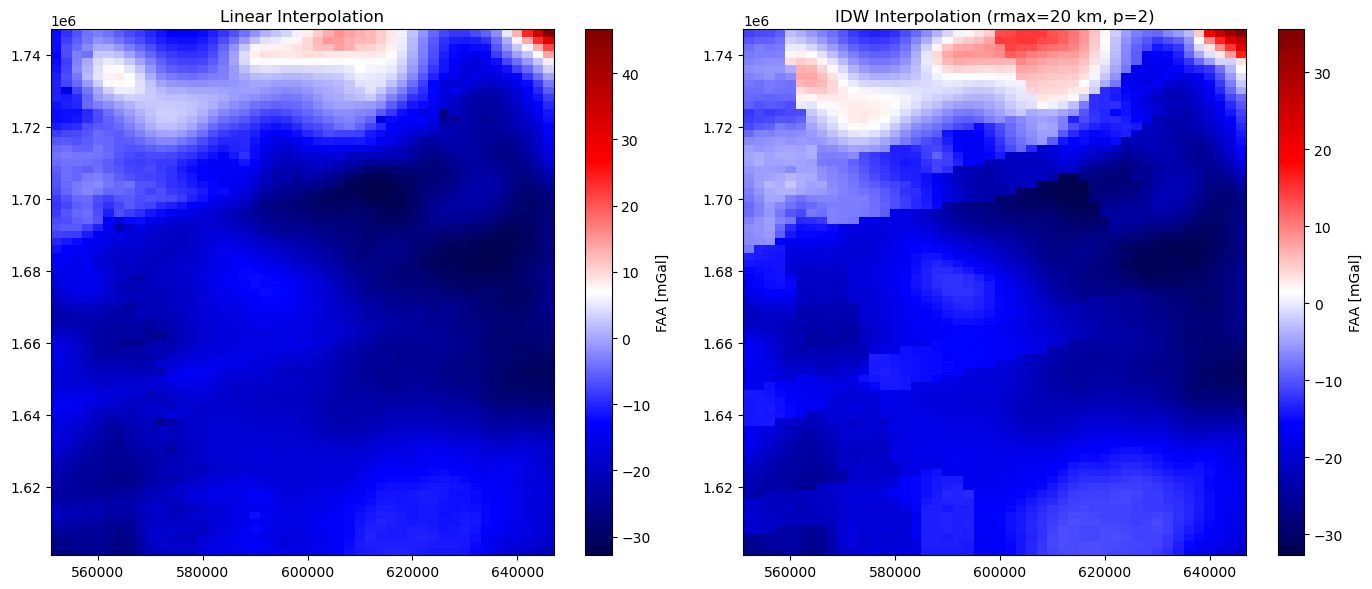

In [63]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='seismic')
plt.title("Linear Interpolation")
plt.colorbar(label='FAA [mGal]')

plt.subplot(1, 2, 2)
plt.pcolormesh(xi, yi, zi_idw, shading='auto', cmap='seismic')
plt.title("IDW Interpolation (rmax=20 km, p=2)")
plt.colorbar(label='FAA [mGal]')

plt.tight_layout()
plt.show()

In [64]:
rmax = 10000  # radius in meters
p = 2         # IDW power

zi_idw = np.full_like(xi, np.nan, dtype=float)

data_x = combined_x
data_y = combined_y
data_z = combined_gravity

for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        x0, y0 = xi[i, j], yi[i, j]

        dists = np.sqrt((data_x - x0)**2 + (data_y - y0)**2)

        within_radius = dists < rmax
        if not np.any(within_radius):
            continue  

        d = dists[within_radius]
        z = data_z[within_radius]

        d[d == 0] = 1e-10

        weights = 1 / d**p
        zi_idw[i, j] = np.sum(weights * z) / np.sum(weights)

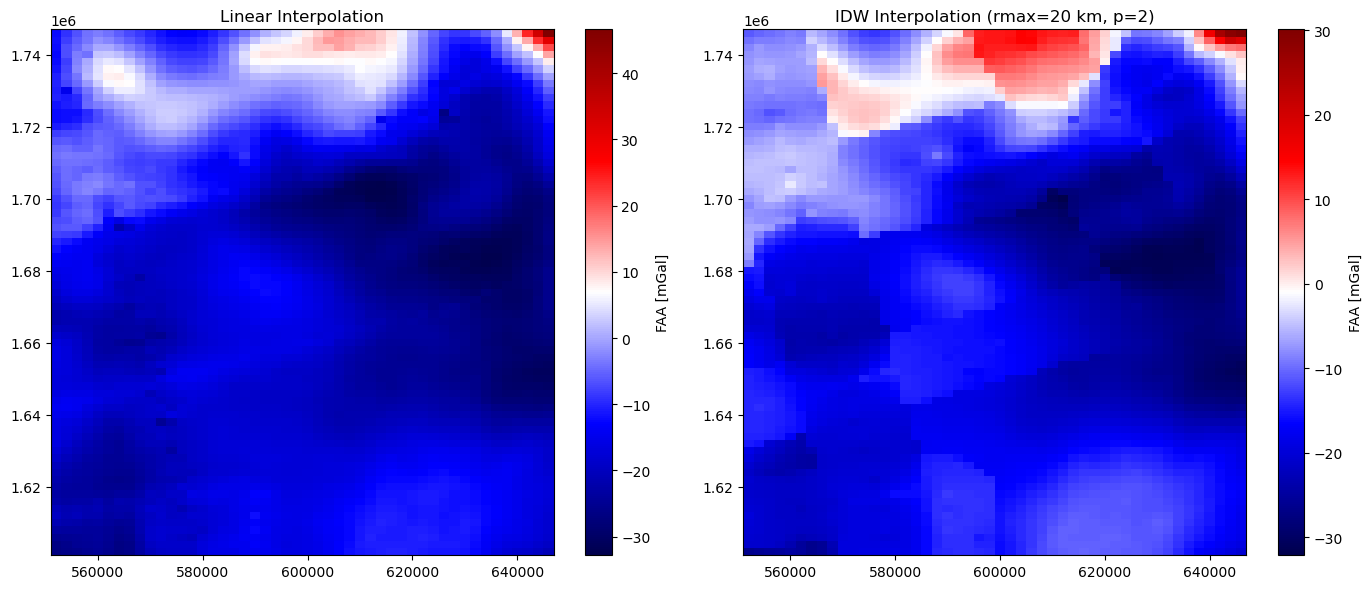

In [65]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='seismic')
plt.title("Linear Interpolation")
plt.colorbar(label='FAA [mGal]')

plt.subplot(1, 2, 2)
plt.pcolormesh(xi, yi, zi_idw, shading='auto', cmap='seismic')
plt.title("IDW Interpolation (rmax=20 km, p=2)")
plt.colorbar(label='FAA [mGal]')

plt.tight_layout()
plt.show()

In [66]:
print(garanti_cleaned[['x', 'y']].describe())
# full garanti area
x_min, x_max = 390000, 860000
y_min, y_max = 1390000, 2050000

# x_min, x_max = 550000, 650000
# y_min, y_max = 1600000, 1750000

                  x             y
count  3.771915e+06  3.771915e+06
mean   5.684183e+05  1.692026e+06
std    8.776617e+04  1.689825e+05
min    3.992490e+05  1.394812e+06
25%    5.111023e+05  1.515442e+06
50%    5.538854e+05  1.710977e+06
75%    6.152223e+05  1.835810e+06
max    8.566500e+05  2.047624e+06


In [67]:
ship_subset = garanti_cleaned[
    (garanti_cleaned['x'] >= x_min) & (garanti_cleaned['x'] <= x_max) &
    (garanti_cleaned['y'] >= y_min) & (garanti_cleaned['y'] <= y_max)
].copy()

sat_subset = satellite_projected[
    (satellite_projected['x'] >= x_min) & (satellite_projected['x'] <= x_max) &
    (satellite_projected['y'] >= y_min) & (satellite_projected['y'] <= y_max)
].copy()

print(f"Ship points: {len(ship_subset)}, Satellite points: {len(sat_subset)}")

Ship points: 3771915, Satellite points: 94112


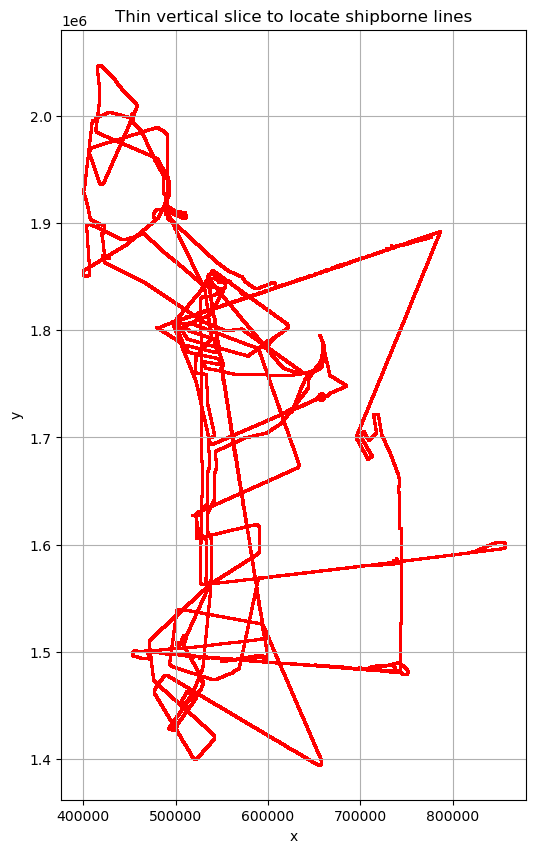

In [68]:
preview = garanti_cleaned[
    (garanti_cleaned['x'] > x_min) & (garanti_cleaned['x'] < x_max)
]
plt.figure(figsize=(6, 10))
plt.scatter(preview['x'], preview['y'], s=1, color='red')
plt.title("Thin vertical slice to locate shipborne lines")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [69]:
sat_subset['min_distance_to_ship'] = np.nan

x_ship = ship_subset['x'].values
y_ship = ship_subset['y'].values

for idx, sat_point in tqdm(sat_subset.iterrows(), total=len(sat_subset)):
    x_sat, y_sat = sat_point['x'], sat_point['y']
    distances = np.sqrt((x_ship - x_sat)**2 + (y_ship - y_sat)**2) * 0.001  # km
    sat_subset.at[idx, 'min_distance_to_ship'] = distances.min()

  1%|▋                                                                           | 902/94112 [01:41<2:54:06,  8.92it/s]


KeyboardInterrupt: 

In [119]:
#radius of 5 km
sat_filtered = sat_subset[sat_subset['min_distance_to_ship'] > 5]

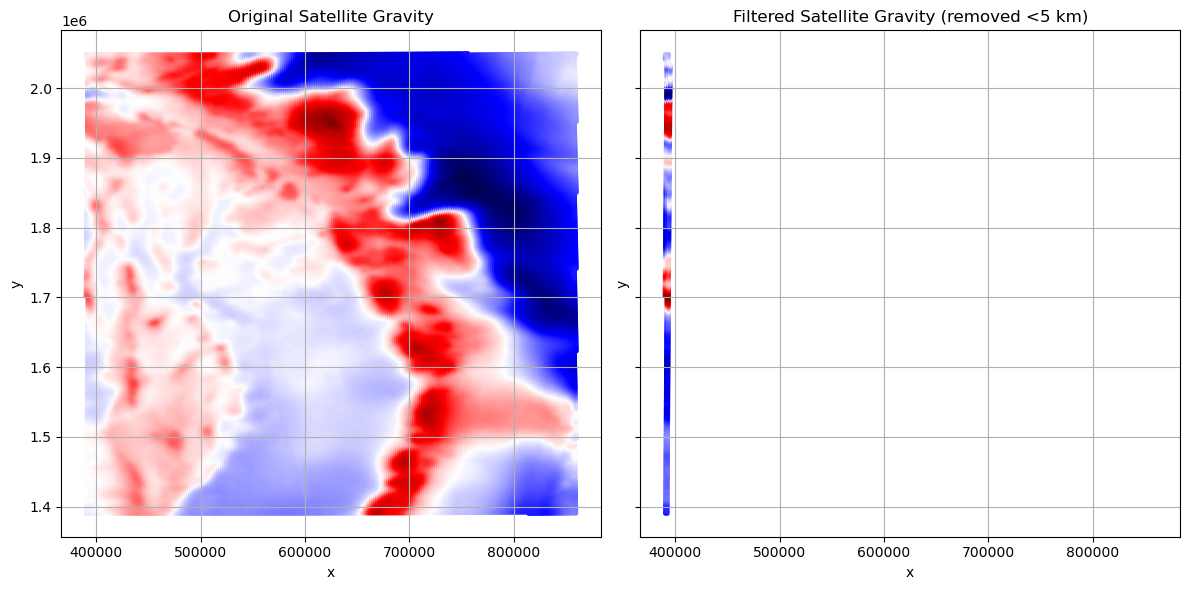

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

axs[0].scatter(sat_subset['x'], sat_subset['y'], c=sat_subset['z'], s=5, cmap='seismic')
axs[0].set_title("Original Satellite Gravity")

axs[1].scatter(sat_filtered['x'], sat_filtered['y'], c=sat_filtered['z'], s=5, cmap='seismic')
axs[1].set_title("Filtered Satellite Gravity (removed <5 km)")

for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [118]:
combined_x = np.concatenate([ship_subset['x'].values, sat_filtered['x'].values])
combined_y = np.concatenate([ship_subset['y'].values, sat_filtered['y'].values])
combined_gravity = np.concatenate([ship_subset['FAA'].values, sat_filtered['z'].values])

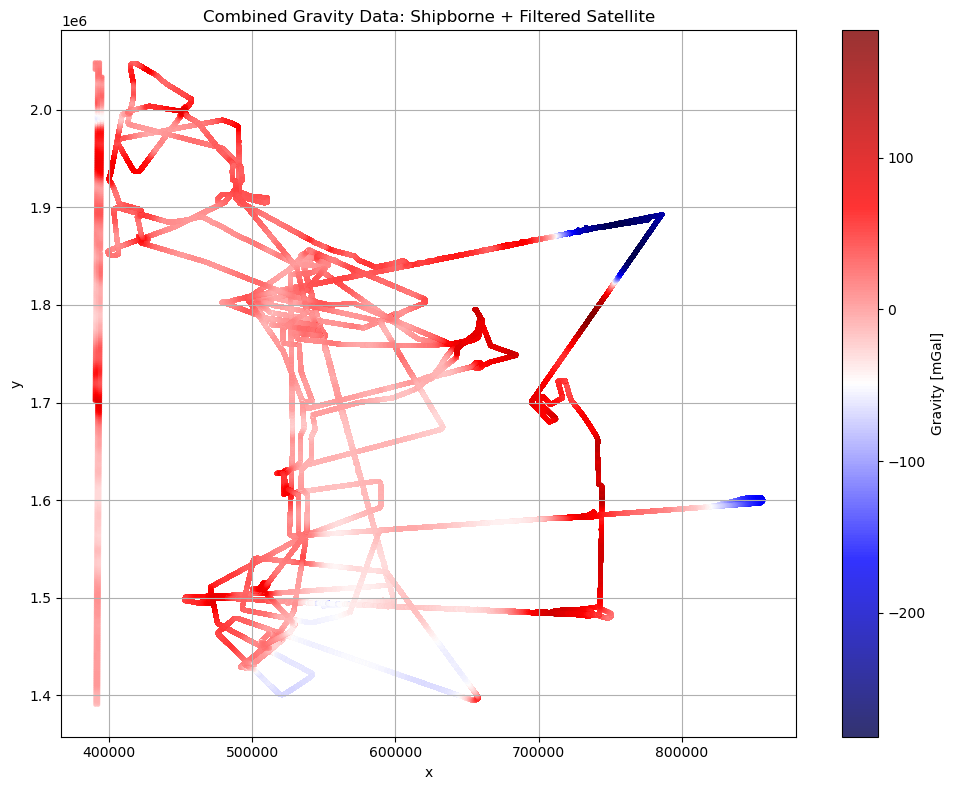

In [73]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(combined_x, combined_y, c=combined_gravity, cmap='seismic', s=5, alpha=0.8)
plt.colorbar(sc, label='Gravity [mGal]')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Combined Gravity Data: Shipborne + Filtered Satellite')
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


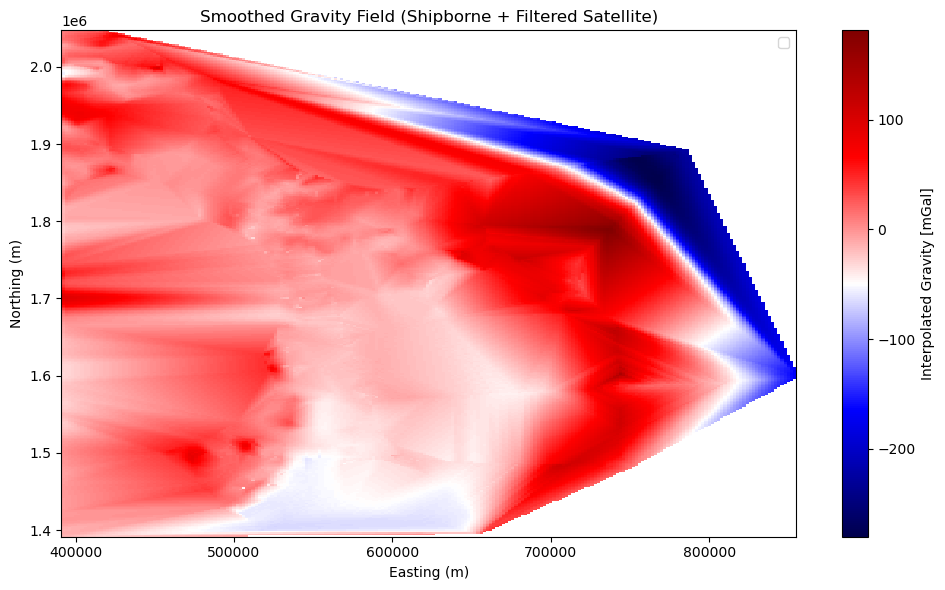

In [74]:
edge = 2000 
spacing = 2000  

xmin = combined_x.min() + edge
xmax = combined_x.max() - edge
ymin = combined_y.min() + edge
ymax = combined_y.max() - edge

xi, yi = np.meshgrid(
    np.arange(xmin, xmax, spacing),
    np.arange(ymin, ymax, spacing)
)

zi = griddata(
    points=(combined_x, combined_y),
    values=combined_gravity,
    xi=(xi, yi),
    method='linear'
)

plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='seismic')
plt.colorbar(label='Interpolated Gravity [mGal]')

# plt.scatter(xi.flatten(), yi.flatten(), c='k', s=2, alpha=0.3, label='Data Points')
# plt.scatter(combined_x, combined_y, c='y', s=2, alpha=0.3, label='Data Points')

plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Smoothed Gravity Field (Shipborne + Filtered Satellite)")
plt.legend()
plt.tight_layout()
plt.show()

### Exporting the grid


In [ ]:

export_df = pd.DataFrame({
    'x': xi.flatten(),
    'y': yi.flatten(),
    'gravity': zi.flatten()
})

export_df = export_df.dropna()

export_df.to_csv("gravity interpolated grid/unfiltered OBS/interpolated_gravity_withOBS.csv", index=False)

In [ ]:
import rasterio
from rasterio.transform import from_origin
import numpy as np

res_x = spacing
res_y = spacing

x_origin = xi[0, 0]
y_origin = yi[0, 0]

transform = from_origin(x_origin, y_origin + res_y * zi.shape[0], res_x, res_y)

with rasterio.open(
    'gravity interpolated grid/unfiltered OBS/interpolated_gravity_withOBS.tif',
    'w',
    driver='GTiff',
    height=zi.shape[0],
    width=zi.shape[1],
    count=1,
    dtype=zi.dtype,
    crs='EPSG:32620',  
    transform=transform,
    nodata=np.nan
) as dst:
    dst.write(zi, 1)

In [ ]:
np.savetxt(
    "gravity interpolated grid/unfiltered OBS/interpolated_gravity_withOBS.xyz",
    np.column_stack((xi.flatten(), yi.flatten(), zi.flatten())),
    fmt="%.3f",
    delimiter=" ",
    header="X Y Gravity",
    comments=""
)

## Cutting the gebco bathy for 

In [109]:
import xarray as xr
from scipy.interpolate import RegularGridInterpolator
import pyproj
import numpy as np
from pyproj import Transformer

edge = 2000 
spacing = 2000  

x_min, x_max = 390000, 860000
y_min, y_max = 1392019.570, 2050000

xi, yi = np.meshgrid(
    np.arange(x_min, x_max + spacing, spacing),
    np.arange(y_min, y_max + spacing, spacing)
)

zi = griddata(
    points=(combined_x, combined_y),
    values=combined_gravity,
    xi=(xi, yi),
    method='linear'
)

ds = xr.open_dataset("gebco_2024.nc")
lons = ds['lon'].values
lats = ds['lat'].values
elev = ds['elevation'].values  
# print(ds)

In [111]:
transformer = Transformer.from_crs("EPSG:32620", "EPSG:4326", always_xy=True)

# edges for Garanti

x_min, x_max = 390000, 860000
y_min, y_max = 1392019.570, 2050000

lon_min, lat_min = transformer.transform(x_min, y_min)
lon_max, lat_max = transformer.transform(x_max, y_max)

print(f"xmin, xmax in lon: ({lon_min}, {lon_max})")
print(f"ymin, ymax in lat: ({lat_min}, {lat_max})")

xmin, xmax in lon: (-64.01268880541838, -59.59104787242798)
ymin, ymax in lat: (12.590104758021921, 18.509871285017237)


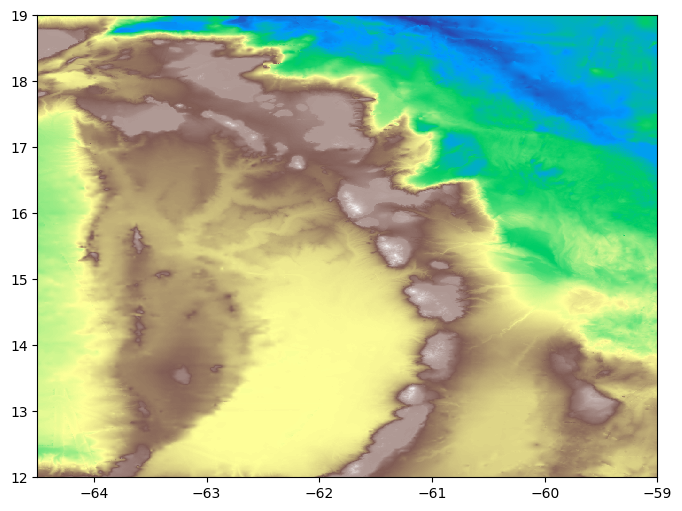

In [112]:
lon_min, lon_max = -64.5, -59.0
lat_min, lat_max = 12.0, 19.0

subset_bathy = ds.sel(lon = slice(lon_min, lon_max), lat = slice(lat_min, lat_max))
lons = subset_bathy['lon'].values
lats = subset_bathy['lat'].values
elev = subset_bathy['elevation'].values 
# print(subset_bathy)

plt.figure(figsize =(8,6))
plt.pcolormesh(lons, lats, elev, cmap = "terrain", shading = "auto")

In [113]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32620", always_xy=True)
lon_grid, lat_grid = np.meshgrid(lons, lats)

lon_flat = lon_grid.ravel()
lat_flat = lat_grid.ravel()

x_utm, y_utm = transformer.transform(lon_flat, lat_flat)

In [114]:
nlat, nlon = len(lats), len(lons)

x_utm_grid = x_utm.reshape((nlat, nlon))
y_utm_grid = y_utm.reshape((nlat, nlon))

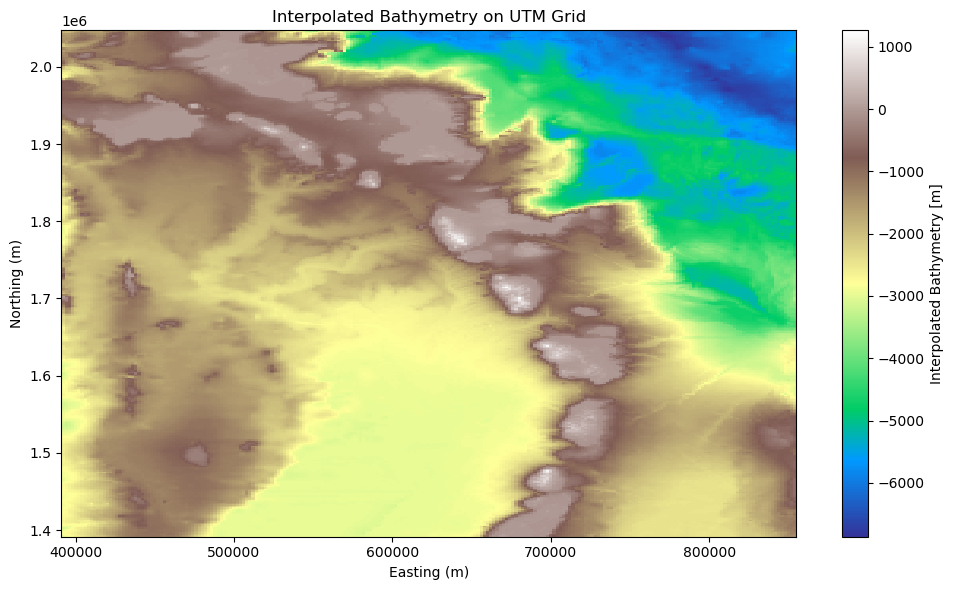

In [80]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(xi, yi, bathy_utm_interp, shading='auto', cmap='terrain')
plt.colorbar(label='Interpolated Bathymetry [m]')
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Interpolated Bathymetry on UTM Grid")
plt.tight_layout()
plt.show()

In [115]:
print("Bathymetry NaNs:", np.isnan(bathy_utm_interp).sum(), "out of", bathy_utm_interp.size)

Bathymetry NaNs: 0 out of 76096


In [82]:
# plt.figure(figsize=(10, 6))
# plt.scatter(combined_x, combined_y, s=2, c='r', label='Gravity points')
# plt.scatter(x_utm, y_utm, s=1, c='b', alpha=0.3, label='Bathymetry points')
# plt.legend()
# plt.title("Check Overlap Between Gravity and Bathy")
# plt.xlabel("Easting (m)")
# plt.ylabel("Northing (m)")
# plt.show()

In [116]:
print("Gravity grid extent:")
print("x:", xi.min(), "to", xi.max())
print("y:", yi.min(), "to", yi.max())

Gravity grid extent:
x: 390000 to 860000
y: 1392019.57 to 2050019.57


In [117]:
print("Bathymetry UTM extent:")
print("x:", np.min(x_utm), "to", np.max(x_utm))
print("y:", np.min(y_utm), "to", np.max(y_utm))

Bathymetry UTM extent:
x: 336922.32144389476 to 935531.3556757541
y: 1326784.0075993405 to 2105384.5162515356


In [85]:
x_flat = xi.ravel()
y_flat = yi.ravel()
z_flat = bathy_utm_interp.ravel()  

valid = ~np.isnan(z_flat)
x_valid = x_flat[valid]
y_valid = y_flat[valid]
z_valid = z_flat[valid]
np.savetxt(
    'interpolated_bathymetry_utm20n.xyz',
    np.column_stack([x_valid, y_valid, z_valid]),
    fmt="%.3f",
    delimiter=' ',
    header='Easting Northing Bathymetry_m',
    comments=''
)

print("Exported to 'interpolated_bathymetry_utm20n.xyz'")

Exported to 'interpolated_bathymetry_utm20n.xyz'


In [86]:
def export_to_surfer_ascii_grd(xi, yi, zi, filename="bathy_interp.grd"):
    """
    Export a regular grid to Surfer ASCII .grd format (Surfer 7+ format).
    xi, yi should be 2D arrays from np.meshgrid.
    zi is the interpolated bathymetry grid.
    """
    nrows, ncols = zi.shape
    x_min, x_max = xi[0, 0], xi[0, -1]
    y_min, y_max = yi[0, 0], yi[-1, 0]

    with open(filename, 'w') as f:
        f.write("DSAA\n")
        f.write(f"{ncols} {nrows}\n")
        f.write(f"{x_min:.3f} {x_max:.3f}\n")
        f.write(f"{y_min:.3f} {y_max:.3f}\n")
        f.write(f"{np.nanmin(zi):.3f} {np.nanmax(zi):.3f}\n")
        for row in zi:
            row_str = ' '.join(f"{val:.3f}" if not np.isnan(val) else "-9999.0" for val in row)
            f.write(row_str + "\n")
    print(f"Exported Surfer ASCII grid: {filename}")

In [87]:
export_to_surfer_ascii_grd(xi, yi, bathy_utm_interp, "interpolated_bathymetry_utm20n.grd")

Exported Surfer ASCII grid: interpolated_bathymetry_utm20n.grd


In [95]:
data_save = np.vstack((xi.flatten(), yi.flatten(), bathy_utm_interp.flatten())).T
np.savetxt("interpolated_bathymetry_utm20n.txt", data_save, delimiter = ' ', fmt = '%1.3f')
print(data_save)


[[ 3.92002910e+05  1.39234031e+06 -1.87361399e+03]
 [ 3.94002910e+05  1.39234031e+06 -1.99312383e+03]
 [ 3.96002910e+05  1.39234031e+06 -2.01712811e+03]
 ...
 [ 8.50002910e+05  2.04634031e+06 -1.34518273e+03]
 [ 8.52002910e+05  2.04634031e+06 -1.35702716e+03]
 [ 8.54002910e+05  2.04634031e+06 -1.38821078e+03]]


In [90]:
import rasterio
from rasterio.transform import from_origin
import numpy as np

# Assumes:
# xi, yi = UTM coordinate meshgrid (from np.meshgrid)
# bathy_utm_interp = interpolated bathymetry values on that grid

# Define transform (top-left origin, pixel size)
x_origin = xi[0, 0]  # top-left x
y_origin = yi[0, 0]  # top-left y

pixel_width = xi[0, 1] - xi[0, 0]
pixel_height = yi[1, 0] - yi[0, 0]  # typically negative for north-down orientation

transform = from_origin(x_origin, y_origin, pixel_width, -pixel_height)

# Flip vertically if needed (depending on how your yi is ordered)
if yi[0, 0] < yi[-1, 0]:  # ascending Y → top-down image
    bathy_utm_interp = np.flipud(bathy_utm_interp)

with rasterio.open(
    "interpolated_bathymetry_utm20n.tif",
    "w",
    driver="GTiff",
    height=bathy_utm_interp.shape[0],
    width=bathy_utm_interp.shape[1],
    count=1,
    dtype="float32",
    crs="EPSG:32620",  # UTM Zone 20N
    transform=transform,
    nodata=-9999.0
) as dst:
    dst.write(np.where(np.isnan(bathy_utm_interp), -9999.0, bathy_utm_interp).astype("float32"), 1)

print("GeoTIFF saved as 'interpolated_bathymetry_utm20n.tif'")


GeoTIFF saved as 'interpolated_bathymetry_utm20n.tif'


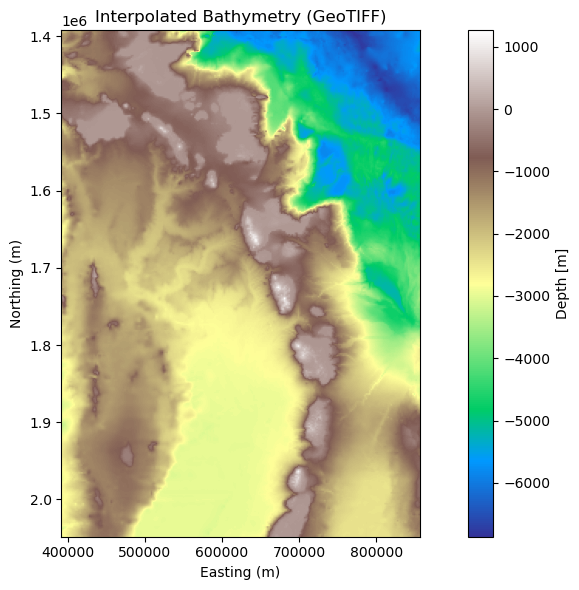

In [91]:
with rasterio.open("interpolated_bathymetry_utm20n.tif") as src:
    bathy_data = src.read(1)
    transform = src.transform
    crs = src.crs
    
bathy_data = np.ma.masked_equal(bathy_data, src.nodata)

plt.figure(figsize=(10, 6))
plt.imshow(bathy_data, cmap='terrain', origin='upper',
           extent=[
               transform[2], transform[2] + transform[0] * bathy_data.shape[1],
               transform[5] + transform[4] * bathy_data.shape[0], transform[5]
           ])
plt.title("Interpolated Bathymetry (GeoTIFF)")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="Depth [m]")
plt.tight_layout()
plt.show()


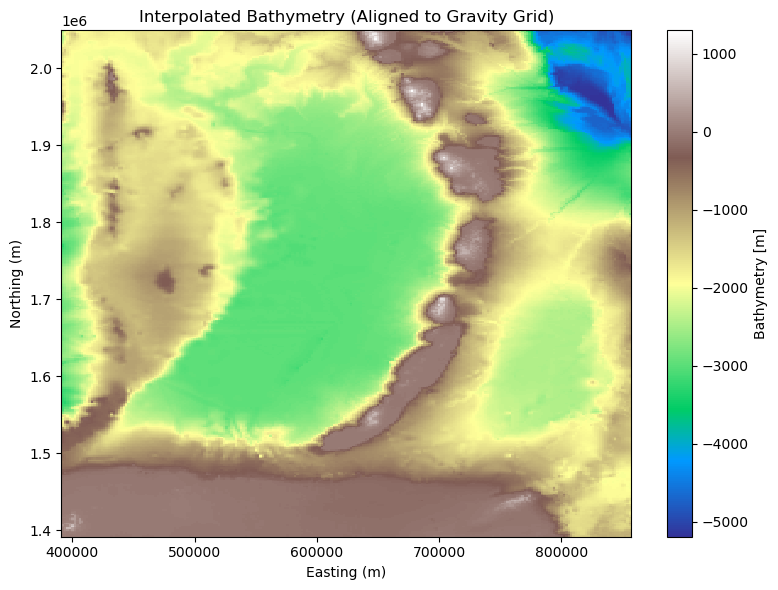

In [98]:
import xarray as xr
import numpy as np
from pyproj import Transformer
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

# 1. Define gravity grid (same as before)
edge = 2000 
spacing = 2000  

xmin = combined_x.min() + edge
xmax = combined_x.max() - edge
ymin = combined_y.min() + edge
ymax = combined_y.max() - edge

xi, yi = np.meshgrid(
    np.arange(xmin, xmax + spacing, spacing),
    np.arange(ymin, ymax + spacing, spacing)
)

# 2. Load GEBCO bathymetry
ds = xr.open_dataset("gebco_2024.nc")

# 3. Define transformer to UTM 32620
transformer_to_utm = Transformer.from_crs("EPSG:4326", "EPSG:32620", always_xy=True)

# 4. Get lat/lon grid and convert to UTM
lons = ds['lon'].values
lats = ds['lat'].values
lon_grid, lat_grid = np.meshgrid(lons, lats)

x_utm, y_utm = transformer_to_utm.transform(lon_grid, lat_grid)

# 5. Interpolator requires increasing coordinates. Check direction of lats:
if np.any(np.diff(lats) < 0):
    lats = lats[::-1]
    elev = ds['elevation'].values[::-1, :]
else:
    elev = ds['elevation'].values

# 6. Transform lat/lon vectors to UTM
x_coords, _ = transformer_to_utm.transform(lons, np.full_like(lons, lat_grid[0,0]))
_, y_coords = transformer_to_utm.transform(np.full_like(lats, lon_grid[0,0]), lats)

# 7. Create interpolator
bathy_interp = RegularGridInterpolator(
    (y_coords, x_coords),  # Y then X for 2D image shape
    elev,
    bounds_error=False,
    fill_value=np.nan
)

# 8. Interpolate bathy onto the gravity grid
bathy_points = np.column_stack((yi.ravel(), xi.ravel()))
bathy_interp_values = bathy_interp(bathy_points).reshape(xi.shape)

# 9. Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yi, bathy_interp_values, cmap='terrain', shading='auto')
plt.colorbar(label='Bathymetry [m]')
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Interpolated Bathymetry (Aligned to Gravity Grid)")
plt.tight_layout()
plt.show()


In [99]:
print("Gravity grid extent:")
print(f"  Shape: {bathy_interp_values.shape}")
print("x:", xi.min(), "to", xi.max())
print("y:", yi.min(), "to", yi.max())

Gravity grid extent:
x: 392002.9100208793 to 856002.9100208792
y: 1392340.3087247969 to 2048340.3087247969


In [100]:
print("\nBathymetry Grid:")
print(f"  Shape: {bathy_interp_values.shape}")
print(f"  X extent: {xi.min()} to {xi.max()}")  # Should be the same as gravity grid
print(f"  Y extent: {yi.min()} to {yi.max()}")


Bathymetry Grid:
  Shape: (329, 233)
  X extent: 392002.9100208793 to 856002.9100208792
  Y extent: 1392340.3087247969 to 2048340.3087247969


In [105]:
data_save = np.vstack((xi.flatten(), yi.flatten(), bathy_interp_values.flatten())).T
np.savetxt("interpolated_bathymetry_utm20n.txt", data_save, delimiter = ' ', fmt = '%1.3f')
print(data_save)


[[ 3.92002910e+05  1.39234031e+06  1.31204995e+01]
 [ 3.94002910e+05  1.39234031e+06  8.90528971e+00]
 [ 3.96002910e+05  1.39234031e+06  1.17734351e+00]
 ...
 [ 8.52002910e+05  2.04834031e+06 -4.91780274e+03]
 [ 8.54002910e+05  2.04834031e+06 -5.01892343e+03]
 [ 8.56002910e+05  2.04834031e+06 -5.06110710e+03]]


In [106]:
print("yii shape:", yi.shape)
print("bathy_interp_values shape:", bathy_interp_values.shape)


yii shape: (329, 233)
bathy_interp_values shape: (329, 233)
